# Problem Set 1: Analysis of racial disparities in felony sentencing

# 0. Load packages and imports

In [530]:
## basic functionality
import pandas as pd
import numpy as np
import re

## can add others if you need them
import matplotlib.pyplot as plt

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## 0.1: Load the data (0 points)

Load the `sentencing_asof0405.csv` data

*Notes*: You may receive a warning about mixed data types upon import; feel free to ignore

In [532]:
sentencing = pd.read_csv("sentencing_asof0405.csv")

/var/folders/tj/gn0fs7tx6ml_jnjbzkw10wpr0000gn/T/ipykernel_35739/3422513696.py:1: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  sentencing = pd.read_csv("sentencing_asof0405.csv")


## 0.2: Print head, dimensions, info (0 points)

In [534]:
sentencing.head()
sentencing.info()
sentencing.shape
sentencing.size
sentencing.ndim

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
0,1.497650e+11,1.756910e+11,8/15/84 0:00,PROMIS Conversion,False,5.051011e+10,1.163040e+11,FIRST DEGREE MURDER,2,12/17/14 0:00,...,NaN,8/9/84 0:00,NaN,CHICAGO POLICE DEPT,NaN,8/15/84 0:00,8/15/84 0:00,Charge(S) Approved,9/21/84 0:00,Homicide
1,1.497650e+11,1.756910e+11,8/15/84 0:00,PROMIS Conversion,False,5.051021e+10,9.826507e+10,HOME INVASION,14,12/17/14 0:00,...,NaN,8/9/84 0:00,NaN,CHICAGO POLICE DEPT,NaN,8/15/84 0:00,8/15/84 0:00,Charge(S) Approved,9/21/84 0:00,Homicide
2,1.497650e+11,1.756910e+11,8/15/84 0:00,PROMIS Conversion,False,5.051645e+10,1.319730e+11,FIRST DEGREE MURDER,4,12/17/14 0:00,...,NaN,8/9/84 0:00,NaN,CHICAGO POLICE DEPT,NaN,8/15/84 0:00,8/15/84 0:00,Charge(S) Approved,9/21/84 0:00,Homicide
3,1.497650e+11,1.756910e+11,8/15/84 0:00,PROMIS Conversion,False,5.051650e+10,1.319660e+11,FIRST DEGREE MURDER,5,12/17/14 0:00,...,NaN,8/9/84 0:00,NaN,CHICAGO POLICE DEPT,NaN,8/15/84 0:00,8/15/84 0:00,Charge(S) Approved,9/21/84 0:00,Homicide
4,1.497650e+11,1.756910e+11,8/15/84 0:00,PROMIS Conversion,False,5.051665e+10,9.805964e+10,HOME INVASION,13,12/17/14 0:00,...,NaN,8/9/84 0:00,NaN,CHICAGO POLICE DEPT,NaN,8/15/84 0:00,8/15/84 0:00,Charge(S) Approved,9/21/84 0:00,Homicide


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248146 entries, 0 to 248145
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CASE_ID                            248146 non-null  float64
 1   CASE_PARTICIPANT_ID                248146 non-null  float64
 2   RECEIVED_DATE                      248146 non-null  object 
 3   OFFENSE_CATEGORY                   248146 non-null  object 
 4   PRIMARY_CHARGE_FLAG                248146 non-null  bool   
 5   CHARGE_ID                          248146 non-null  float64
 6   CHARGE_VERSION_ID                  248146 non-null  float64
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  248146 non-null  object 
 8   CHARGE_COUNT                       248146 non-null  int64  
 9   DISPOSITION_DATE                   248146 non-null  object 
 10  DISPOSITION_CHARGED_CHAPTER        248146 non-null  object 
 11  DISPOSITION_CHARGED_ACT            2427

(248146, 41)

10173986

2

# Part one: data cleaning/interpretation

## 1.1: Understanding the unit of analysis (5 points)

- Print the number of unique values for the following columns. Do so in a way that avoids copying/pasting code for 
the three:

    - Cases (`CASE_ID`)
    - People in that case (`CASE_PARTICIPANT_ID`)
    - Charges (`CHARGE_ID`)

- Write a couple sentences on the following and show an example of each (e.g., a case involving multiple people):
    
    - Why there are more unique people than unique cases?
    - Why there are more unique charges than unique people?

- Print the mean and median number of charges per case/participant 

- Print the mean and median number of participants per case

- Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.


In [537]:
# Unique Values
unique_values = sentencing[["CASE_ID", "CASE_PARTICIPANT_ID", "CHARGE_ID"]].nunique()
print(unique_values)
values = sentencing[["CASE_ID", "CASE_PARTICIPANT_ID", "CHARGE_ID"]].value_counts()
print(values.head())
# Cases
# There are more unique people than unique cases because each case can include more than one individual. 
# For example, a crime with multiple people involved could lead to more participants in one case, like with an aggravated assault case that includes multiple perpetrators.
# An example in the code is shown in the second row of values.head() above, which includes the same case number but differing participant numbers.
# There could be more unique charges than unique people because a single person can face multiple charges in a single case such as with the case below: 
# For example, being charged with trespassing and robbery in one case trial.

#Mean and median of charges per case
charges_case = sentencing.groupby("CASE_ID")["CHARGE_ID"].count()
print(charges_case)
mean_charges_case = charges_case.mean()
median_charges_case = charges_case.median()

print(mean_charges_case)
print(median_charges_case)
#per participant
charges_participant = sentencing.groupby("CASE_PARTICIPANT_ID")["CHARGE_ID"].count()
mean_charges_participant = charges_participant.mean()
median_charges_participant = charges_participant.median()

print(mean_charges_participant)
print(median_charges_participant)
#participants per case
participants_case = sentencing.groupby("CASE_ID")["CASE_PARTICIPANT_ID"].count()
mean_participants_case = participants_case.mean()
median_participants_case = participants_case.median()

print(mean_participants_case)
print(median_participants_case)
#Data following
# Yes, the data seems to enable us to follow a defendant because the same case participant ID applies to multiple cases, which we can also observe because there are participant IDs below that appear in more than one case ID; this can also be thought of us as multiple cases per participant.
cases_participant = sentencing.groupby('CASE_PARTICIPANT_ID')['CASE_ID'].nunique()
multiple_cases = cases_participant[cases_participant > 1]
print(multiple_cases)


CASE_ID                 65457
CASE_PARTICIPANT_ID    137953
CHARGE_ID               79889
dtype: int64
CASE_ID       CASE_PARTICIPANT_ID  CHARGE_ID   
4.213800e+11  8.280430e+11         4.066410e+11    20
2.284780e+11  2.133390e+11         1.471540e+11    20
                                   1.471250e+11    16
4.162400e+11  8.114180e+11         3.968440e+11    15
3.871600e+11  7.238070e+11         3.490850e+11    15
Name: count, dtype: int64
CASE_ID
1.497650e+11    11
1.500660e+11     6
1.545250e+11     1
1.549550e+11     1
1.552230e+11     7
                ..
4.454240e+11     2
4.455160e+11     1
4.455270e+11     1
4.455880e+11     1
4.455930e+11     2
Name: CHARGE_ID, Length: 65457, dtype: int64
3.7909772827963395
3.0
1.798772045551746
1.0
3.7909772827963395
3.0
CASE_PARTICIPANT_ID
1.303410e+11    2
1.631180e+11    2
1.770550e+11    2
1.876540e+11    2
1.880160e+11    2
               ..
8.977710e+11    2
8.981990e+11    2
8.984020e+11    2
8.986680e+11    2
8.988190e+11    2
Name:

## 1.2.1: Which offense is final? (3 points)

- First, read the data documentation [link](https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/files/8597cdda-f7e1-44d1-b0ce-0a4e43f8c980?download=true&filename=CCSAO%20Data%20Glossary.pdf) and summarize in your own words the differences between `OFFENSE_CATEGORY` and `UPDATED_OFFENSE_CATEGORY` 

- Construct an indicator `is_changed_offense` that's True for case-participant-charge observations (rows) where there's a difference between the original charge (offense category) and the most current charge (updated offense category). What are some of the more common changed offenses? (can just print result of sort_values based on original offense category)

- Print one example of a changed offense from one of these categories and comment on what the reason may be


Difference:  Offense category is the initial category of charge while Updated is the final classification of the crime based on the "primary," or main charge.

In [540]:

sentencing["is_changed_offense"] = sentencing["OFFENSE_CATEGORY"] != sentencing["UPDATED_OFFENSE_CATEGORY"]

changing_offenses = sentencing[sentencing["is_changed_offense"]]
common_changed = changing_offenses["OFFENSE_CATEGORY"].value_counts()
common_changed.head()

example = changing_offenses.sort_values('OFFENSE_CATEGORY').iloc[0:4]

example[['CASE_ID', 'OFFENSE_CATEGORY', 'UPDATED_OFFENSE_CATEGORY', 'CHARGE_ID']]


OFFENSE_CATEGORY
PROMIS Conversion               6394
DUI                             3896
UUW - Unlawful Use of Weapon    2155
Other Offense                   2125
Aggravated Battery              1927
Name: count, dtype: int64

,CASE_ID,OFFENSE_CATEGORY,UPDATED_OFFENSE_CATEGORY,CHARGE_ID
161337,4.141310e+11,Aggravated Assault Police Officer,Attempt Homicide,3.933530e+11
231526,4.329330e+11,Aggravated Assault Police Officer,Criminal Damage to Property,4.282790e+11
204443,4.246550e+11,Aggravated Assault Police Officer,Criminal Damage to Property,4.128460e+11
204444,4.246550e+11,Aggravated Assault Police Officer,Criminal Damage to Property,4.128460e+11


Above we have printed out the examples of an offense that originally was "Aggravated Assault Police Officer" but it was updated 
to "Attempt Homicide". The reason for this could be that new evidence or testimony came to light showing that the assault was
more serious than initially believed. For example, if the defendant used a weapon or had intent to kill, 
the charge may have then been changed from aggravated assault to attempted homicide. Further, the updated category is based on the primary charge, which is most likely the most serious charge and which may fall under the homicide category.

## 1.2.2: Simplifying the charges (5 points)

Using the field (`UPDATED_OFFENSE_CATEGORY`), create a new field, `simplified_offense_derived`, that simplifies the many offense categories into broader buckets using the following process:

First, combine all offenses beginning with "Aggravated" into a single category without that prefix (e.g., Aggravated Battery and Battery just becomes Battery)

Then:
- Combine all offenses with arson into a single arson category (`Arson`)
- Combine all offenses with homicide into a single homicide category (`Homicide`)
- Combine all offenses with vehicle/vehicular in the name into a single vehicle category (`Vehicle-related`)
- Combine all offenses with battery in the name into a single battery category (`Battery`)

Try to do so efficiently (e.g., using map and a dictionary or np.select rather than separate line for each recoded offense)

Print the difference between the # of unique offenses in the original `UPDATED_OFFENSE_CATEGORY` field and the # of unique offenses in your new `simplified_offense_derived` field


In [585]:
sentencing['simplified_offense_derived'] = sentencing['UPDATED_OFFENSE_CATEGORY'].str.replace("Aggravated ", " ", regex = False)
cats = ["Arson", "Homicide", "Vehicle-related", "Battery"]
conditions = [sentencing["UPDATED_OFFENSE_CATEGORY"].str.contains("arson", case = False, na = False),
              sentencing["UPDATED_OFFENSE_CATEGORY"].str.contains("homicide", case = False, na = False),
              sentencing["UPDATED_OFFENSE_CATEGORY"].str.contains("vehicle|vehicular", case = False, na = False),
              sentencing["UPDATED_OFFENSE_CATEGORY"].str.contains("battery", case = False, na = False)]

print(sentencing[['UPDATED_OFFENSE_CATEGORY', 'simplified_offense_derived']])

sentencing["simplified_offense_derived"] = np.select(conditions, cats, default = sentencing["UPDATED_OFFENSE_CATEGORY"])

print(sentencing[['UPDATED_OFFENSE_CATEGORY', 'simplified_offense_derived']])

original_offenses = sentencing['UPDATED_OFFENSE_CATEGORY'].nunique()
simplified_offenses = sentencing['simplified_offense_derived'].nunique()

print(original_offenses - simplified_offenses)

                         UPDATED_OFFENSE_CATEGORY  \
0                                        Homicide   
1                                        Homicide   
2                                        Homicide   
3                                        Homicide   
4                                        Homicide   
...                                           ...   
248141               UUW - Unlawful Use of Weapon   
248142                           Domestic Battery   
248143  Driving With Suspended Or Revoked License   
248144  Driving With Suspended Or Revoked License   
248145  Driving With Suspended Or Revoked License   

                       simplified_offense_derived  
0                                        Homicide  
1                                        Homicide  
2                                        Homicide  
3                                        Homicide  
4                                        Homicide  
...                                           ...  

## 1.3: Cleaning additional variables (10 points)

Clean the following variables; make sure to retain the original variable in data and use the derived suffix so it's easier to pull these cleaned out variables later (e.g., `age_derived`) to indicate this was a transformation

- Race: create True/false indicators for `is_black_derived` (Black only or mixed race with hispanic), Non-Black Hispanic, so either hispanic alone or white hispanic (`is_hisp_derived`), White non-hispanic (`is_white_derived`), or none of the above (`is_othereth_derived`)

- Gender: create a boolean true/false indicator for `is_male_derived` (false is female, unknown, or other)

- Age at incident: you notice outliers like 130-year olds. Winsorsize the top 0.01% of values to be equal to the 99.99th percentile value pre-winsorization. Call this `age_derived`

- Create `sentenceymd_derived` that's a version of `SENTENCING_DATE` converted to datetime format. Also create a rounded version, `sentenceym_derived`, that's rounded down to the first of the month and the year (e.g., 01-05-2016 and 01-27-2016 each become 01-01-2016)
    - Hint: all timestamps are midnight so u can strip in conversion. For full credit, before converting, you notice that some of the years have been mistranscribed (e.g., 291X or 221X instead of 201X). Programatically fix those (eg 2914 -> 2014). Even after cleaning, there will still be some that are after the year 2021 that we'll filter out later. For partial credit, you can ignore the timestamps that cause errors and set errors = "coerce" within `pd.to_datetime()` to allow the conversion to proceed. 

- Sentencing judge: create an identifier (`judgeid_derived`) for each unique judge (`SENTENCE_JUDGE`) structured as judge_1, judge_2...., with the order determined by sorting the judges (will sort on fname then last). When finding unique judges, there are various duplicates we could weed out --- for now, just focus on (1) the different iterations of Doug/Douglas Simpson, (2) the different iterations of Shelley Sutker (who appears both with her maiden name and her hyphenated married name). 
     - Hint: due to mixed types, you may need to cast the `SENTENCE_JUDGE` var to a diff type to sort

After finishing, print a random sample of 10 rows (data.sample(n = 10)) with the original and cleaned columns for the relevant variables to validate your work

In [609]:
# check the categories
race_cats = sentencing["RACE"].unique()
print(race_cats)
# race derived
sentencing['is_black_derived'] = (sentencing["RACE"] == "Black") | (sentencing["RACE"] == "White/Black [Hispanic or Latino]")
sentencing['is_hisp_derived'] = (sentencing["RACE"] == "Hispanic") | (sentencing["RACE"] == "White [Hispanic or Latino]")
sentencing['is_white_derived'] = (sentencing["RACE"] == "White")
sentencing['is_othereth_derived'] = ~(sentencing['is_black_derived'] | sentencing['is_hisp_derived'] | sentencing['is_white_derived'])

# gender derived
sentencing['is_male_derived'] = sentencing["GENDER"] == "Male"

# age derived
winsor = sentencing["AGE_AT_INCIDENT"].quantile(0.9999)
sentencing['age_derived'] = np.where(sentencing['AGE_AT_INCIDENT'] > winsor, winsor, sentencing['AGE_AT_INCIDENT'])

# years
year_cats = sentencing['SENTENCE_DATE'].unique()
print(year_cats)
sentencing['SENTENCE_DATE'] = sentencing['SENTENCE_DATE'].astype(str)
year_glitches = {
    '291': '201', '221': '201', 
    '210': '200', '220': '200',
    '230': '200', '240': '200',
    '250': '200', '260': '200',
    '270': '200', '280': '200',
    '290': '200'}

for old, new in year_glitches.items():
    sentencing['SENTENCE_DATE'] = sentencing['SENTENCE_DATE'].str.replace(old, new, regex=False)
sentencing['sentenceymd_derived'] = pd.to_datetime(sentencing['SENTENCE_DATE'], errors='coerce')
sentencing['sentenceym_derived'] = sentencing['sentenceymd_derived'].dt.to_period('M').dt.to_timestamp()

num_invalid_dates = sentencing['sentenceymd_derived'].isna().sum()
sentencing = sentencing[sentencing['sentenceymd_derived'].dt.year <= 2021]
print(sentencing.head())

# judge ids
def unique_judges(judge_name):
    if pd.isna(judge_name):
        return judge_name
    if 'Doug' in judge_name or 'Douglas' in judge_name and 'Simpson' in judge_name:
        return 'Douglas Simpson'
    if 'Shelley' in judge_name and ('Sutker' in judge_name or 'Sutker-Dermer' in judge_name):
        return 'Shelley Sutker'
    return judge_name
sentencing['SENTENCE_JUDGE_UNIQUE'] = sentencing['SENTENCE_JUDGE'].apply(unique_judges)
sentencing['SENTENCE_JUDGE_UNIQUE'] = sentencing['SENTENCE_JUDGE_UNIQUE'].astype(str)
judge_standard = sentencing['SENTENCE_JUDGE_UNIQUE'].dropna().sort_values().unique()
judge_id_mapping = {judge: f'judge_{i+1}' for i, judge in enumerate(judge_standard)}
sentencing['judgeid_derived'] = sentencing['SENTENCE_JUDGE_UNIQUE'].map(judge_id_mapping)

# printing a random sample
print(sentencing.sample(n=10)[['RACE', 'is_black_derived', 'is_hisp_derived', 'is_white_derived', 
                                  'is_othereth_derived', 'GENDER', 'is_male_derived', 'AGE_AT_INCIDENT', 'age_derived', 
                                  'SENTENCE_DATE', 'sentenceym_derived', 'SENTENCE_JUDGE', 'judgeid_derived']])




['Black' 'White [Hispanic or Latino]' 'White' 'HISPANIC' nan 'ASIAN'
 'White/Black [Hispanic or Latino]' 'Asian' 'American Indian' 'Unknown'
 'Biracial']
['1986-06-02' '2014-10-16' '1992-03-25' ... '2021-12-15' '2021-05-25'
 '2021-03-31']
        CASE_ID  CASE_PARTICIPANT_ID RECEIVED_DATE   OFFENSE_CATEGORY  \
0  1.497650e+11         1.756910e+11  8/15/84 0:00  PROMIS Conversion   
1  1.497650e+11         1.756910e+11  8/15/84 0:00  PROMIS Conversion   
2  1.497650e+11         1.756910e+11  8/15/84 0:00  PROMIS Conversion   
3  1.497650e+11         1.756910e+11  8/15/84 0:00  PROMIS Conversion   
4  1.497650e+11         1.756910e+11  8/15/84 0:00  PROMIS Conversion   

   PRIMARY_CHARGE_FLAG     CHARGE_ID  CHARGE_VERSION_ID  \
0                False  5.051011e+10       1.163040e+11   
1                False  5.051021e+10       9.826507e+10   
2                False  5.051645e+10       1.319730e+11   
3                False  5.051650e+10       1.319660e+11   
4                False  5.0

## 1.4: Subsetting rows to analytic dataset (5 points)

You decide based on the above to simplify things in the following ways:
    
- Subset to cases where only one participant is charged, since cases with >1 participant might have complications like 
plea bargains/informing from other participants affecting the sentencing of the focal participant

- To go from a participant-case level dataset, where each participant is repeated across charges tied to the case, to a participant-level dataset, where each participant has one charge, subset to a participant's primary charge and their current sentence (`PRIMARY_CHARGE_FLAG` is True and `CURRENT_SENTENCE_FLAG` is True). Double check that this worked by confirming there are no longer multiple charges for the same case-participant

- Filter out observations where judge is nan or nonsensical (indicated by is.null or equal to FLOOD)

- Subset to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)

After completing these steps, print the number of rows in the data

In [547]:

single_charge = sentencing.groupby('CASE_ID')['CASE_PARTICIPANT_ID'].nunique()
single_charge = single_charge[single_charge == 1].index

sentencing_single = (sentencing[sentencing['CASE_ID'].isin(single_charge)]
                     [(sentencing['PRIMARY_CHARGE_FLAG'] == True) & 
                      (sentencing['CURRENT_SENTENCE_FLAG'] == True) &
                      (~sentencing['SENTENCE_JUDGE'].isnull()) &
                      (sentencing['SENTENCE_JUDGE'] != 'FLOOD')])
sentencing['SENTENCE_DATE'] = pd.to_datetime(sentencing['SENTENCE_DATE'], errors='coerce')


sentencing_single = sentencing_single[
    (sentencing['sentenceymd_derived'] >= pd.to_datetime('2012-01-01')) &
    (sentencing['sentenceymd_derived'] <= pd.to_datetime('2021-04-05'))
]
print("Final sentences filtered:", len(sentencing_single))


/var/folders/tj/gn0fs7tx6ml_jnjbzkw10wpr0000gn/T/ipykernel_35739/3067437596.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sentencing_single = (sentencing[sentencing['CASE_ID'].isin(single_charge)]
/var/folders/tj/gn0fs7tx6ml_jnjbzkw10wpr0000gn/T/ipykernel_35739/3067437596.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sentencing['SENTENCE_DATE'] = pd.to_datetime(sentencing['SENTENCE_DATE'], errors='coerce')


Final sentences filtered: 13747


/var/folders/tj/gn0fs7tx6ml_jnjbzkw10wpr0000gn/T/ipykernel_35739/3067437596.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sentencing_single = sentencing_single[


# Part two: investigating Black vs. White sentencing disparities

Now that the data are cleaned, we're going to investigate different types of disparities in sentencing between Black defendants and White defendants. We're focusing on these groups for the purpose of the problem set, but the analysis could be extended to study Hispanic defendants or, in a different jurisdiction, Asian and other minoritized groups.

**Details if interested in digging deeper**: If interested (optional), you can read more technical coverage of how we might (1) measure disparities, and (2) what factors you want to adjust for when deciding whether two defendants are 'similarly situated' but for their race in the following sources:

- [Review of sentencing disparities research](https://www.journals.uchicago.edu/doi/full/10.1086/701505)
- [Discussion of causal model/blinding race at charging stage of the prosecutorial process](https://5harad.com/papers/blind-charging.pdf)
- [Discussion of measuring discrimination in policing that can generalize to the sentencing case](https://www.annualreviews.org/doi/abs/10.1146/annurev-criminol-011518-024731)
- [General discussion of causal challenges in measuring between-group disparities](https://osf.io/preprints/socarxiv/gx4y3/)

**One major caveat**: when investigating whether two similar defendants received different sentences, we're missing one important attribute that influences sentencing: the defendant's criminal history. This influences sentencing both through sentencing guidelines, which can prescribe longer sentences for those who have certain types of prior convictions, and through judicial discretion if judges are more lenient with first-time defendants. The above sources discuss how much we want to "control away" for this prior history, since if we think there are racial biases in which defendants, conditional on *committing* a crime, are arrested and charged, we may not want to adjust for that factor. More discussion [in this article](https://www.themarshallproject.org/2019/12/03/the-growing-racial-disparity-in-prison-time)


## 2.0: (0 points)

First, read in the following dataset (regardless of progress on part one): `sentencing_cleaned.pkl` (if you can't read in the pkl you can read in the .csv format but may need to recast some of the datetime columns)

*Note*: don't worry if there are slight differences in your output from Part One and this dataset/it's not a good use of time to try to reverse engineer Part One answers from this cleaned data.

In [551]:
cleaned_data = pd.read_pickle("sentencing_cleaned.pkl")
print(cleaned_data.head())

         CASE_ID  CASE_PARTICIPANT_ID          RECEIVED_DATE  \
9   149765331439         175691153649  8/15/1984 12:00:00 AM   
16  150065796098         162105612284  8/23/1984 12:00:00 AM   
18  154954734978         225758446387   6/8/2001 12:00:00 AM   
19  155222744754         217349881776  1/31/2001 12:00:00 AM   
26  155327892699         217212381455   2/6/2001 12:00:00 AM   

     OFFENSE_CATEGORY  PRIMARY_CHARGE_FLAG    CHARGE_ID  CHARGE_VERSION_ID  \
9   PROMIS Conversion                 True  50510062193       112898098217   
16  PROMIS Conversion                 True  50792360681       113332130159   
18  PROMIS Conversion                 True  54885211141       174293345821   
19  PROMIS Conversion                 True  53899906462       280120721775   
26  PROMIS Conversion                 True  53938518259       164877860811   

                    DISPOSITION_CHARGED_OFFENSE_TITLE  CHARGE_COUNT  \
9                                 FIRST DEGREE MURDER             1   
16  

## 2.1: Investigating one type of between-group difference: who reaches the sentencing stage? (5 points)

Tabulate and visualize the proportion of defendants, out of all defendants sentenced in a given month/year, who are Black and who are White (separate proportions)

- Denominator is number of unique cases that month
- Numerator for black defendants is count of is_black_derived
- Numerator for white defendants is count of is_white_derived
- Fraction of each is numerator/denominator

- Print the table
- Create a graph with two lines--- one for Black defendants as fraction of total; another for White defendants. Make sure it includes a legend summarizing which color is for which group, and clean the legend so that it has informative names (e.g., Black or White rather than prop_black or prop_white)
- Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020? 

**Optional challenge**: improve the viz by shading the background of the visualization for months with fewer than 100 cases 

**Optional challenge**: improve the viz by adding a vertical line for 12-01-2016, the month that new State's Attorney Foxx took office 

Index(['CASE_ID', 'CASE_PARTICIPANT_ID', 'RECEIVED_DATE', 'OFFENSE_CATEGORY',
       'PRIMARY_CHARGE_FLAG', 'CHARGE_ID', 'CHARGE_VERSION_ID',
       'DISPOSITION_CHARGED_OFFENSE_TITLE', 'CHARGE_COUNT', 'DISPOSITION_DATE',
       'DISPOSITION_CHARGED_CHAPTER', 'DISPOSITION_CHARGED_ACT',
       'DISPOSITION_CHARGED_SECTION', 'DISPOSITION_CHARGED_CLASS',
       'DISPOSITION_CHARGED_AOIC', 'CHARGE_DISPOSITION',
       'CHARGE_DISPOSITION_REASON', 'SENTENCE_JUDGE', 'SENTENCE_COURT_NAME',
       'SENTENCE_COURT_FACILITY', 'SENTENCE_PHASE', 'SENTENCE_DATE',
       'SENTENCE_TYPE', 'CURRENT_SENTENCE_FLAG', 'COMMITMENT_TYPE',
       'COMMITMENT_TERM', 'COMMITMENT_UNIT', 'LENGTH_OF_CASE_in_Days',
       'AGE_AT_INCIDENT', 'RACE', 'GENDER', 'INCIDENT_CITY',
       'INCIDENT_BEGIN_DATE', 'INCIDENT_END_DATE', 'LAW_ENFORCEMENT_AGENCY',
       'LAW_ENFORCEMENT_UNIT', 'ARREST_DATE', 'FELONY_REVIEW_DATE',
       'FELONY_REVIEW_RESULT', 'ARRAIGNMENT_DATE', 'UPDATED_OFFENSE_CATEGORY',
       'is_changed_

,months,unique_cases,num_black,num_white,fraction_black,fraction_white
0,2012-01,1674,1134,242,0.677419,0.144564
1,2012-02,1450,941,233,0.648966,0.160690
2,2012-03,1612,1030,255,0.638958,0.158189
3,2012-04,1436,1000,211,0.696379,0.146936
4,2012-05,1545,1074,223,0.695146,0.144337
...,...,...,...,...,...,...
106,2020-11,491,298,76,0.606925,0.154786
107,2020-12,537,347,85,0.646182,0.158287
108,2021-01,447,278,50,0.621924,0.111857
109,2021-02,491,320,66,0.651731,0.134420


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Proportion of Black and White Defendants Sentenced')

Text(0.5, 0, 'Month/Year')

Text(0, 0.5, 'Proportion of Defendants')

(0.0, 1.0)

([<matplotlib.axis.XTick at 0x15013c9e0>,
 [Text(0.0, 0, '2012-01'),
  Text(6.0, 0, '2012-07'),
  Text(12.0, 0, '2013-01'),
  Text(18.0, 0, '2013-07'),
  Text(24.0, 0, '2014-01'),
  Text(30.0, 0, '2014-07'),
  Text(36.0, 0, '2015-01'),
  Text(42.0, 0, '2015-07'),
  Text(48.0, 0, '2016-01'),
  Text(54.0, 0, '2016-07'),
  Text(60.0, 0, '2017-01'),
  Text(66.0, 0, '2017-07'),
  Text(72.0, 0, '2018-01'),
  Text(78.0, 0, '2018-07'),
  Text(84.0, 0, '2019-01'),
  Text(90.0, 0, '2019-07'),
  Text(96.0, 0, '2020-01'),
  Text(102.0, 0, '2020-07'),
  Text(108.0, 0, '2021-01')])

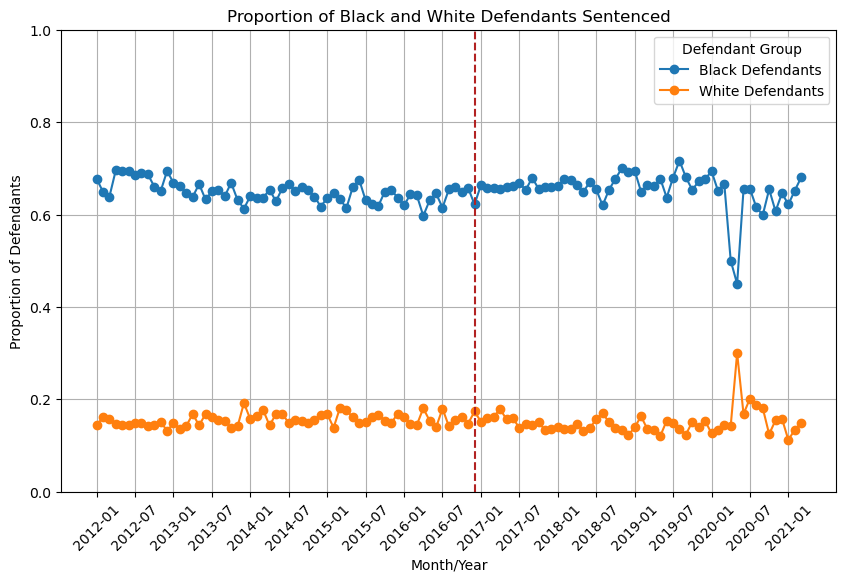

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [611]:
print(cleaned_data.columns)

# creating a months variable
cleaned_data['months'] = cleaned_data['sentenceym_derived'].dt.to_period('M')
months = month_data['months'].astype(str)

month_data = cleaned_data.groupby("months").agg(
    unique_cases=("CASE_ID", "nunique"),
    num_black=("is_black_derived", "sum"), 
    num_white=("is_white_derived", "sum")
).reset_index()

# calculate fractions
prop_black = month_data['fraction_black'] = month_data["num_black"] / month_data["unique_cases"]
prop_white = month_data['fraction_white'] = month_data["num_white"] / month_data["unique_cases"]

#table
table = month_data[['months', 'unique_cases', 'num_black', 'num_white', 'fraction_black', 'fraction_white']]
table

# plot
plt.figure(figsize=(10, 6))
plt.plot(months, prop_black, marker='o', label='Black Defendants')
plt.plot(months, prop_white, marker='o', label='White Defendants')
plt.title('Proportion of Black and White Defendants Sentenced')
plt.xlabel("Month/Year")
plt.ylabel("Proportion of Defendants")
plt.legend(title='Defendant Group')
plt.grid()
# optional vertical line
plt.vlines(x='2016-12', ymin=0, ymax=1, color='firebrick', linestyle='--', label="Foxx Takes Office")
plt.ylim(0, 1)
plt.xticks(months[::6],  rotation=45)  
plt.show()

# math notation
from IPython.display import display, Math

# where t = month and N = total unique samples 
display(Math(r"Proportion_{B}(t) = \frac{\sum_{i=1}^{N_t} is\_black\_derived_i}{N_t}"))

display(Math(r"Proportion_{W}(t) = \frac{\sum_{i=1}^{N_t} is\_white\_derived_i}{N_t}"))

These proportions show that the sum of the total cases N per month t for the proportion of black defendants and white defendents can be divided by the total number of cases per month for all races to obtain the overall proportion. The math and graph show that in April and May of 2020, there is a spike in white defendants and a notable decrease in black defendants, which could be attributed to the Black Lives Matter social justice movement that swept across the country.

## 2.2: Investigating the first type of disparity: probation versus incaceration (10 points)

One type of disparity beyond who arrives at the sentencing stage is whether the defendant receives probation or incaceration.

According to the codebook, incarceration is indicated by `COMMITMENT_TYPE` == "Illinois Department of Corrections"

Recreate the previous plot but where the y axis represents the difference between the following proportions (can be either Black - White or White - Black but make sure to label), adding a smoothed line:

- Percent of black defendants who are incarcerated out of all black defendants that month/year 
- Percent of white defendants who are incarcerated out of all white defendants that month/year 

In a markdown cell after, write 1-2 sentences on your observations of trends over time. Do gaps seem to be widening or increasing?

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Difference in Incarceration Rates Between Black and White Defendants')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Difference in Incarceration Rates (%) (Black - White)')

(array([14975., 15340., 15706., 16071., 16436., 16801., 17167., 17532.,
        17897., 18262., 18628.]),
 [Text(14975.0, 0, '2011'),
  Text(15340.0, 0, '2012'),
  Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021')])

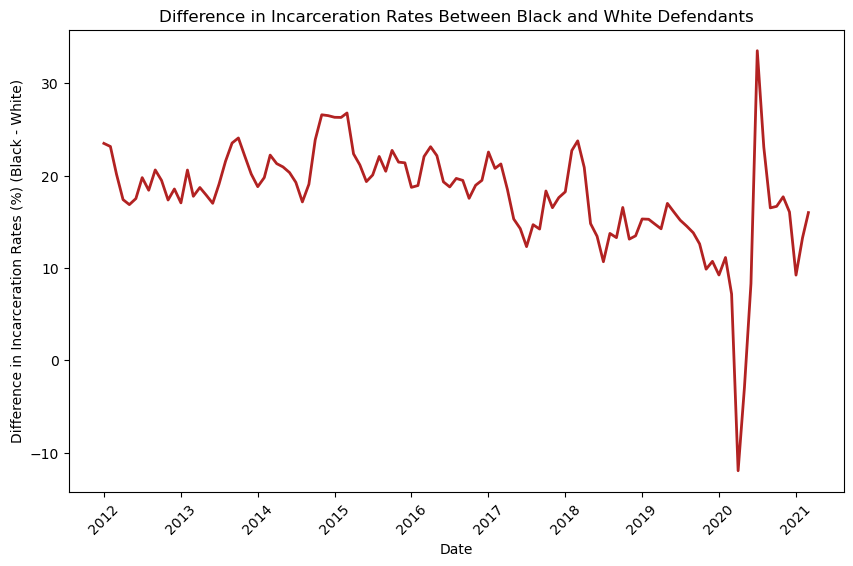

In [613]:

# incarcerated duplicate
incarcerated_data = cleaned_data[cleaned_data["COMMITMENT_TYPE"] == "Illinois Department of Corrections"].copy()
incarcerated_data["year_month"] = incarcerated_data["sentenceym_derived"]
cleaned_data["year_month"] = cleaned_data["sentenceym_derived"]

total_race = cleaned_data.groupby("year_month").agg(
    total_black=("is_black_derived", "sum"),
    total_white=("is_white_derived", "sum")
).reset_index()

race_incarceration = incarcerated_data.groupby("year_month").agg(
    incarcerated_black=("is_black_derived", "sum"),
    incarcerated_white=("is_white_derived", "sum")
).reset_index()

incarc_of_total = pd.merge(race_incarceration, total_race, on='year_month')

incarc_of_total["percent_black_incarcerated"] = (incarc_of_total["incarcerated_black"] / incarc_of_total["total_black"]) * 100
incarc_of_total["percent_white_incarcerated"] = (incarc_of_total["incarcerated_white"] / incarc_of_total["total_white"]) * 100

incarc_of_total['differences'] = incarc_of_total['percent_black_incarcerated'] - incarc_of_total['percent_white_incarcerated']
incarc_of_total['smoothed'] = incarc_of_total['differences'].rolling(window=3, min_periods=1).mean()

# plot
plt.figure(figsize=(10, 6))
plt.plot(merged_data['year_month'], incarc_of_total['smoothed'], color='firebrick', label= "Incarceration Difference", linewidth=2)
plt.title('Difference in Incarceration Rates Between Black and White Defendants')
plt.xlabel('Date')
plt.ylabel('Difference in Incarceration Rates (%) (Black - White)')
plt.xticks(rotation=45)
plt.show()

The gaps seem seem to be widening. Briefly in 2020, the difference approached 0. However, disparities swung in the other direction, indicating the usage of race as a factor in determining incarceration. Also, the brief effect of the social movements in 2020 were negated by swings back to the extremes in following years.

## 2.3: Investigating mechanisms: incaceration rates by charge

Your colleague sees the previous graph and is worried that the gap could be different---either wider or smaller---if you adjust for the fact that prosecutors have discretion in what crimes to charge defendants with. If white defendants are charged with crimes that tend to receive probation rather than incarceration, that could explain some of the gaps.

In the next questions, you'll begin to investigate this.

### 2.3.1: Find the most common offenses (3 points)

First, create a set of 'frequent offenses' that represent (over the entire period) the union of the 10 offenses Black defendant are most likely to be charged with and the 10 offenses white defendants are most likely to be charged with (might be far less than 20 total if there's a lot of overlap in common charges)

Use the `simplified_offense_derived` for this

In [560]:
black_def = cleaned_data[(cleaned_data["is_black_derived"] == True) ]
white_def = cleaned_data[(cleaned_data["is_white_derived"] == True)]

most_black = black_def["simplified_offense_derived"].value_counts().head(10)
most_white = white_def["simplified_offense_derived"].value_counts().head(10)
frequent_offenses = pd.concat([most_black, most_white])
frequent_offenses = set(frequent_offenses.index)
print(frequent_offenses)

{'Battery', 'Narcotics', 'Burglary', 'DUI', 'Other Offense', 'Retail Theft', 'Theft', 'Driving With Suspended Or Revoked License', 'Vehicle-related', 'Residential Burglary', 'Robbery', 'UUW - Unlawful Use of Weapon'}


### 2.3.2: Look at incarceration rates (again just whether incarcerated) by race and offense type for these top offenses (3 points)

Print a wide-format version of the resulting table (so each row is an offense type, one col is black incarceration rate for that offense type; another is the white incarceration rate) and interpret. Which offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?


In [562]:
# total numbers
black_offense = cleaned_data[cleaned_data['is_black_derived'] == True].groupby('simplified_offense_derived').size()
white_offense = cleaned_data[cleaned_data['is_white_derived'] == True].groupby('simplified_offense_derived').size()
# incarcerated numbers
o_black_inc = incarcerated_data[incarcerated_data['is_black_derived'] == True].groupby('simplified_offense_derived').size()
o_white_inc = incarcerated_data[incarcerated_data['is_white_derived'] == True].groupby('simplified_offense_derived').size()

#dict
incarceration_values = {
    'Total Black': black_offense,
    'Incarcerated Black': o_black_inc,
    'Total White': white_offense,
    'Incarcerated White': o_white_inc,
}
incarceration_df = pd.DataFrame(incarceration_values).fillna(0)
#rates
incarceration_df['Black Incarceration Rate'] = incarceration_df['Incarcerated Black'] / incarceration_df['Total Black'] 
incarceration_df['White Incarceration Rate'] = incarceration_df['Incarcerated White'] / incarceration_df['Total White'] 

incarceration_rates = incarceration_df[['Black Incarceration Rate', 'White Incarceration Rate']]

print(incarceration_rates.reset_index().to_string(index=False))

#disparities
incarceration_df["Disparities"] = incarceration_df["Black Incarceration Rate"] - incarceration_df["White Incarceration Rate"]

incarceration_disparities = incarceration_df[["Black Incarceration Rate", "White Incarceration Rate", "Disparities"]].sort_values(by="Disparities", ascending=False)
print(incarceration_disparities.reset_index().head().to_string(index=False))


                   simplified_offense_derived  Black Incarceration Rate  White Incarceration Rate
                                Armed Robbery                  0.949971                  0.919255
                               Armed Violence                  1.000000                       NaN
                                        Arson                  0.671756                  0.517241
                       Assault Police Officer                  0.607692                  0.292683
                        Attempt Armed Robbery                  0.823204                  0.703704
                                      Battery                  0.509032                  0.275552
                                  Bomb Threat                  0.535714                  0.200000
                                      Bribery                  0.347826                  0.111111
                                     Burglary                  0.661927                  0.535763
                    

The offenses showing the largest disparities in incarceration on the basis of race are: Communicating with Witness, Discharge of Firearm, Dogfighting, Gun - Non UUW, and Disarming a Police Officer.

### 2.3.3: Examine whether this changes pre and post change to charging threshold for retail theft (13 points)

One important question is not only whether there are disparities by offense type but also whether these disparities are changing over time.

The SAO, for instance, announced in December of 2016 that they would no longer default to charging retail thefts of under \$1,000 as felonies. This change might have (1) decreased disparities or (2) increased disparities, depending on the correlation between race/ethnicity and magnitude of goods stolen: [news coverage](https://www.dnainfo.com/chicago/20161215/little-village/kim-foxx-raises-bar-for-retail-theft-felonies/). 

Focusing on `simplified_offense_derived` == "Retail theft." Using a function and/or loop (Dec. 2016 is always excluded as a transition month):

- Compare Black-White disparities before and after the change using a two-month bandwidth (so pre is October and November 2016; post is January and February 2017)

- Compare Black-White disparities before and after the change using a four-month bandwidth (so pre is August- November 2016; post is January - April 2017)

- Compare Black-White disparities using an eight-month bandwidth

- Compare Black-White disparities using a twelve-month bandwidth


------------------ 

- Print a table with the results (any organization is fine as long as it's clear)  

- Create a bar chart where the x axis represents different bandwidths (2, 4, etc); the y axis the size of the Black-White gap in whether the defendant receives incarceration, and for each of the x axis points, you have one shaded bar representing "before" the change, another representing "after" the change (make sure that before is ordered before after and the bandwidths are from smallest to largest)

*Note*: for each of the bandwidths include dates the entire month (e.g., for the first, include not only 02-01-2017 but everything up through 02-28-2017; easiest way is for the subsetting to use the rounded `sentenceym_derived`). Also make sure to only include white or black defendants.


**Extra credit**: because the bandwidths have different sample sizes, a better viz incorporates measures of uncertainty. Add standard errors to the estimates using the formula: $(\dfrac{p(1-p)}{n})^{0.5}$ where $p$ is the gap and $N$ is the number of cases in each bandwidth period 


In [565]:
retail_theft_data = cleaned_data[cleaned_data["simplified_offense_derived"] == "Retail Theft"]

disparities = []
band_dict = {
    "2 Months": ('2016-10-01', '2016-11-30', '2017-01-01', '2017-02-28'),
    "4 Months": ('2016-08-01', '2016-11-30', '2017-01-01', '2017-04-30'),
    "8 Months": ('2016-04-01', '2016-11-30', '2017-01-01', '2017-12-31'),
    "12 Months": ('2015-12-01', '2016-11-30', '2017-01-01', '2017-12-31')}

def theft_disparity(pre_band, pre_bandend, post_band, post_bandend):
    pre_policy = retail_theft_data[(retail_theft_data['sentenceym_derived'] >= pre_band) & 
                                  (retail_theft_data['sentenceym_derived'] <= pre_bandend)]
    
    post_policy = retail_theft_data[(retail_theft_data['sentenceym_derived'] >= post_band) & 
                                   (retail_theft_data['sentenceym_derived'] <= post_bandend)]

    black_pre = pre_policy['is_black_derived'].sum()
    ipre_black = pre_policy[pre_policy['COMMITMENT_TYPE'] == "Illinois Department of Corrections"]['is_black_derived'].sum()

    white_pre = pre_policy['is_white_derived'].sum()
    ipre_white = pre_policy[pre_policy['COMMITMENT_TYPE'] == "Illinois Department of Corrections"]['is_white_derived'].sum()

    black_post = post_policy['is_black_derived'].sum()
    ipost_black = post_policy[post_policy['COMMITMENT_TYPE'] == "Illinois Department of Corrections"]['is_black_derived'].sum()

    white_post = post_policy['is_white_derived'].sum()
    ipost_white = post_policy[post_policy['COMMITMENT_TYPE'] == "Illinois Department of Corrections"]['is_white_derived'].sum()

    preblack_rate = ipre_black / black_pre 
    prewhite_rate = ipre_white / white_pre 
    postblack_rate = ipost_black / black_post 
    postwhite_rate = ipost_white / white_post 
    
    before_disparity = preblack_rate - prewhite_rate
    after_disparity = postblack_rate - postwhite_rate

    return before_disparity, after_disparity

for each, (pre_band, pre_bandend, post_band, post_bandend) in band_dict.items():
    before_disparity, after_disparity = theft_disparity(pre_band, pre_bandend, post_band, post_bandend)
    disparities.append((each, before_disparity, after_disparity))

disparity_df = pd.DataFrame(disparities, columns=["Bandwidth", "Disparity Before Policy", "Disparity After Policy"])
print(disparity_df)

   Bandwidth  Disparity Before Policy  Disparity After Policy
0   2 Months                 0.087912                0.154949
1   4 Months                 0.081588                0.081615
2   8 Months                 0.132900                0.064705
3  12 Months                 0.161618                0.064705


Text(0, 0.5, 'Disparity in Incarceration Rates')

Text(0.5, 1.0, 'Black-White Incarceration Disparities Before and After Policy Change')

[Text(0, 0, '2 Months'),
 Text(1, 0, '4 Months'),
 Text(2, 0, '8 Months'),
 Text(3, 0, '12 Months')]

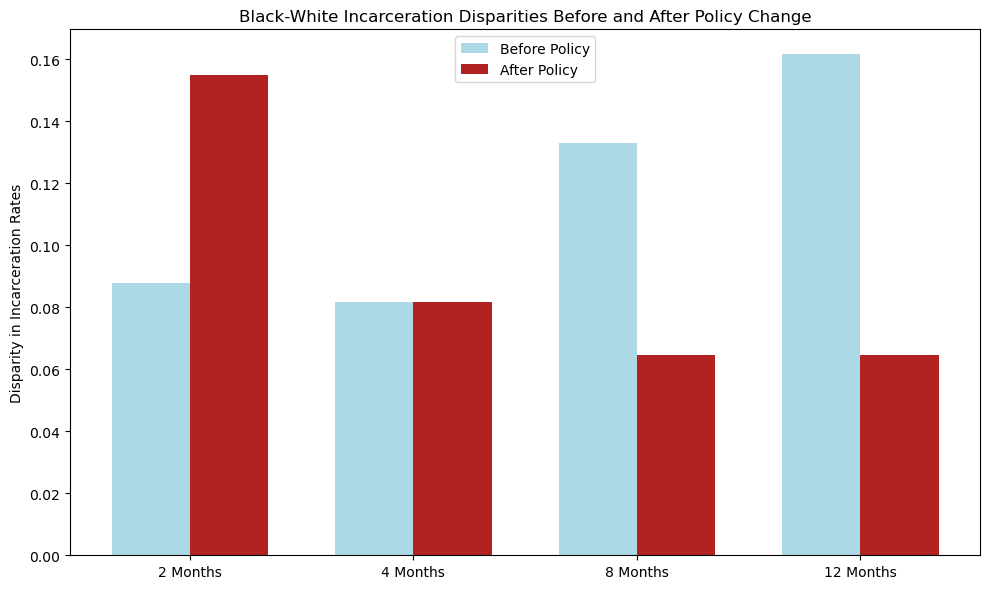

In [566]:
# bar
bandwidth_order = ["2 Months", "4 Months", "8 Months", "12 Months"]
disparity_df['Bandwidth'] = pd.Categorical(disparity_df['Bandwidth'], categories=bandwidth_order, ordered=True)
disparity_df = disparity_df.sort_values(by='Bandwidth')

x = np.arange(len(disparity_df))  # the label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, disparity_df['Disparity Before Policy'], width, label='Before Policy', color='lightblue')
bars2 = ax.bar(x + width/2, disparity_df['Disparity After Policy'], width, label='After Policy', color='firebrick')

ax.set_ylabel('Disparity in Incarceration Rates')
ax.set_title('Black-White Incarceration Disparities Before and After Policy Change')
ax.set_xticks(x)
ax.set_xticklabels(disparity_df['Bandwidth'])
ax.legend()
plt.tight_layout()
plt.show()

### 2.3.3.1: Interpret the results (2 points)

Write a two-sentence interpretation of the results. What might this show about how people on both sides of the issue---those who argued that the retail theft policy change would narrow disparities; those who argued that the change may widen disparities--could support their claims? 

These results show that as the bandwidth increasees, disparities between races become more pronounced under the old theft laws. With the policy change, the broader effect is that inequalities between the two races start to dissipate. Those who argue that the policy narrows disparities would say that in the broad scheme of things, disparities are decreased empirically. Opponents would say that since the 2 month post policy disparity is so great, overall inequality is exacerbated by the retail theft level change.